In [74]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

TICKER = 'AMZN'
data_path = r'./data/raw/'

In [75]:
amzn_stock = yf.download(TICKER, start='2020-01-01', end='2022-12-31')
amzn_stock.reset_index(inplace=True)
amzn_stock

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
...,...,...,...,...,...,...,...
751,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
752,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
753,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
754,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900


In [76]:
amzn_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       756 non-null    datetime64[ns]
 1   Open       756 non-null    float64       
 2   High       756 non-null    float64       
 3   Low        756 non-null    float64       
 4   Close      756 non-null    float64       
 5   Adj Close  756 non-null    float64       
 6   Volume     756 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.5 KB


In [77]:
amzn_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,142.561767,144.413347,140.542017,142.455482,142.455482,8.085101e+07
std,27.932293,27.930445,27.830293,27.856019,27.856019,3.543205e+07
min,82.075500,83.480003,81.301498,81.820000,81.820000,2.903800e+07
25%,118.404501,119.673622,116.074999,118.337875,118.337875,5.708600e+07
50%,154.873245,156.616753,151.846001,154.467499,154.467499,7.057750e+07
75%,164.766998,166.303131,162.958881,164.633247,164.633247,9.502950e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.113460e+08


In [78]:
amzn_stock = amzn_stock.drop(['Adj Close'], axis=1)

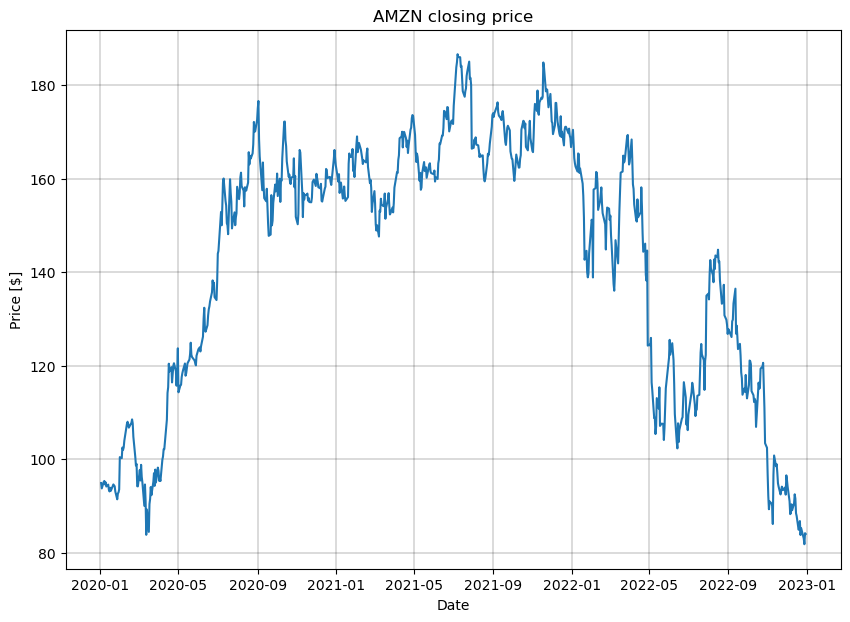

In [79]:
plt.subplots(figsize=(10,7))
sns.lineplot(data=amzn_stock, x='Date', y='Close')
plt.title(f'{TICKER} closing price')
plt.ylabel('Price [$]')
plt.grid(color='k', linewidth=0.2)
plt.show()

In [80]:
closing_df = amzn_stock[['Date', 'Close']]
closing_df = closing_df.set_index('Date')

In [81]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print(" P-Value : ", dftest[1])
    print(" ADF : ",dftest[0])
    print(" Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

ad_test(closing_df)

 P-Value :  0.5851212490976232
 ADF :  -1.3940584189635405
 Critical Values :
	 1% :  -3.4390409569041207
	 5% :  -2.865375732701395
	 10% :  -2.568812543748081


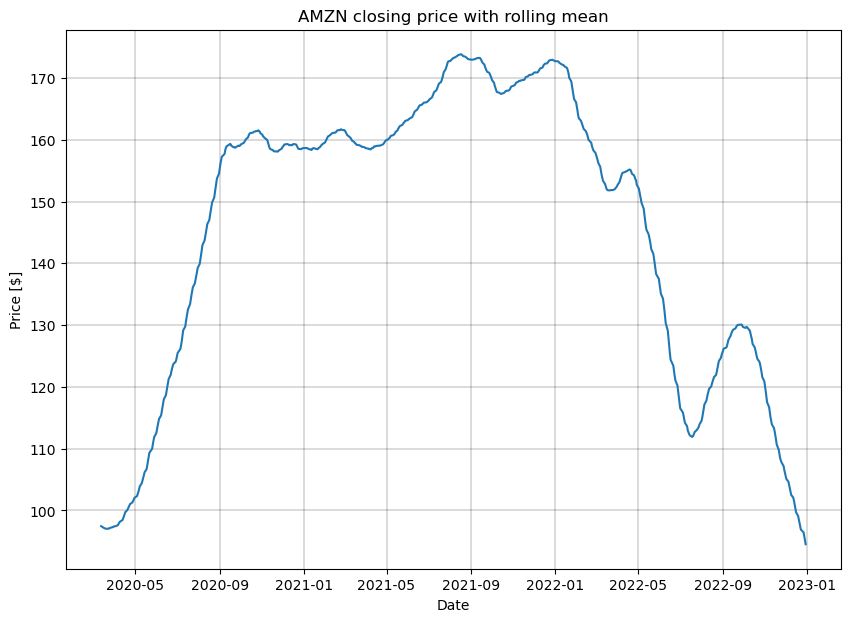

In [82]:
window_size = 50
closing_df['MA'] = closing_df.rolling(window=window_size).mean()
closing_df = closing_df[window_size-1:]
plt.subplots(figsize=(10,7))
sns.lineplot(data=closing_df, x='Date', y='MA')
plt.title(f'{TICKER} closing price with rolling mean')
plt.ylabel('Price [$]')
plt.grid(color='k', linewidth=0.2)
plt.show()

In [83]:
ad_test(closing_df['MA'])

 P-Value :  0.42342160231632264
 ADF :  -1.714959965400214
 Critical Values :
	 1% :  -3.4396995339981444
	 5% :  -2.8656659438580796
	 10% :  -2.5689671530263554
